In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree
import graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.mixture import GaussianMixture
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn import utils
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import math
from sklearn.linear_model import LinearRegression
from csv import *
import csv

In [2]:
df = pd.read_csv("Airbnb_Surveys/new_york/s3_files/new_york/tomslee_airbnb_new_york_1438_2017-07-12.csv")

In [3]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,...,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
0,7739955,1438,38614070,Shared room,NaN,New York,Queens,Jackson Heights,6,5.0,...,1.0,NaN,85.0,NaN,"Room TO SHARE by DAY,week,month",House,2017-07-15 21:30:31.858764,40.749909,-73.876880,0101000020E61000000EA14ACD1E7852C0F0FCA204FD5F...
1,7383173,1438,32628813,Shared room,NaN,New York,Brooklyn,Cypress Hills,14,4.0,...,1.0,NaN,90.0,NaN,Spacious Room: Close to Manhattan,House,2017-07-15 21:30:30.332828,40.678527,-73.889584,0101000020E6100000DFC2BAF1EE7852C0FC3905F9D956...
2,10250852,1438,35553123,Shared room,NaN,New York,Brooklyn,Sheepshead Bay,3,4.5,...,1.0,NaN,239.0,NaN,COZY COUCH,Apartment,2017-07-15 21:30:23.607950,40.583041,-73.957976,0101000020E61000009696917A4F7D52C0139D6516A14A...
3,2188359,1438,5029659,Shared room,NaN,New York,Manhattan,Hell's Kitchen,35,5.0,...,1.0,NaN,165.0,NaN,1 Bdrm Apt 1 Block from Times Sq.,Apartment,2017-07-15 21:30:21.832749,40.758374,-73.991955,0101000020E6100000A306D3307C7F52C0801134661261...
4,19661354,1438,70038324,Shared room,NaN,New York,Manhattan,Upper East Side,0,0.0,...,1.0,NaN,159.0,NaN,NYC Upper East / Midtown East Luxury 1BR,Apartment,2017-07-15 21:30:19.986579,40.761960,-73.959733,0101000020E610000016F9F5436C7D52C01A6EC0E78761...


In [4]:
df = df.drop(columns=['room_id','survey_id', 'host_id', 'country', 'city', 'last_modified', 'location','bathrooms','minstay'])
df = df[df.bedrooms<50]

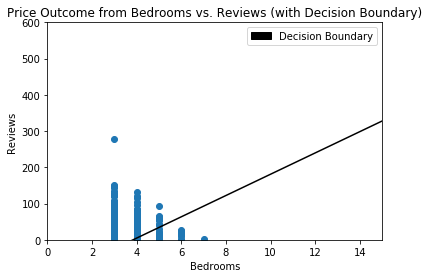

In [5]:
price_range=100
price=250
min_reviews=1
min_satisfaction = 3
beds = 3
borough = 'Manhattan'

df_exact = df[df.overall_satisfaction>=min_satisfaction]
df_exact = df_exact[df_exact.bedrooms==beds]
df_exact = df_exact[df_exact.reviews>=min_reviews]
df_exact = df_exact[df_exact.borough==borough]
df_exact = df_exact[df_exact.price<=price+price_range]
df_exact = df_exact[df_exact.price>=price-price_range]


#Sample input
df = df[df.overall_satisfaction>=min_satisfaction]
df = df[df.bedrooms>=beds]
df = df[df.reviews>=min_reviews]
df = df[df.borough==borough]




#Create datdframes
X = df[["bedrooms","reviews","overall_satisfaction"]]
y = df["price"]

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


y_test = y_test.replace(range(0,price-price_range),0)
y_test = y_test.replace(range(price+price_range,10000),0)
y_test = y_test.replace(range(price-price_range,price+price_range),1)
y_train = y_train.replace(range(0,price-price_range),0)
y_train = y_train.replace(range(price+price_range,10000),0)
y_train = y_train.replace(range(price-price_range,price+price_range),1)

#Train model
model = LogisticRegression(penalty = "l2")
fit = model.fit(X_train,y_train)

#Specify legend colors for decision boundary
black_patch = mpatches.Patch(color='black', label='Decision Boundary')

#Scatter Plot
plt.scatter(x=df["bedrooms"], y=df["reviews"])
plt.title("Price Outcome from Bedrooms vs. Reviews (with Decision Boundary)")
plt.xlabel("Bedrooms")
plt.ylabel("Reviews")
plt.legend(handles=[black_patch])

#Calculate Decision Boundary
b = fit.intercept_
coef = fit.coef_[0]

x = np.arange(0, 1000, 1)
#print(len(b))###numpy arange dependent on changing size of b
y = (b + coef[0] * x) / (-coef[1])

#Plot boundary
plt.plot(x, y, color='black')
plt.ylim(0, 600)
plt.xlim(0,15)
plt.show()

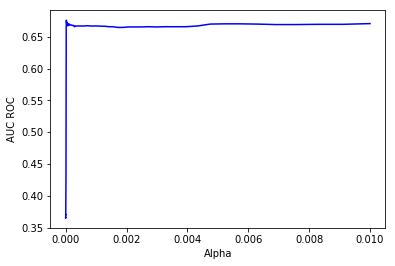

Optimal alpha: 2.3644894126454072e-05


In [6]:
alphas = np.logspace(-6,-2,100)
score = []

#Calculate the optimal alpha to use
for alpha in alphas:
    regr = LogisticRegression(C=alpha, penalty='l2')
    probas_ = regr.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    score.append(roc_auc)
    
alpha_max_score = alphas[np.argmax(score)]

#Plot alphas to see how they improve over time
plt.plot(alphas, score, color='blue')
plt.xlabel('Alpha')
plt.ylabel('AUC ROC')
plt.show()
print("Optimal alpha:", alpha_max_score)

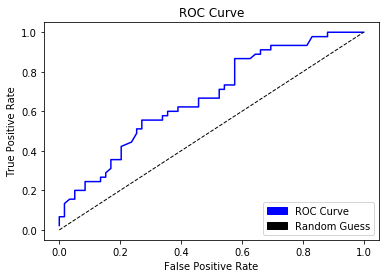

Area under the ROC curve: 0.6706214689265537


In [7]:
#Regression
regr = LogisticRegression(C=alpha_max_score, penalty='l2')
regr.fit(X_train, y_train)

#Colors
roc_curve_patch = mpatches.Patch(color='blue', label='ROC Curve')
random_guess_patch = mpatches.Patch(color='black', label='Random Guess')

#Plot ROC
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1],  linestyle='--',lw=1, color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(handles=[roc_curve_patch, random_guess_patch], loc="lower right")
plt.show()
print ("Area under the ROC curve:", roc_auc)

In [8]:
df = df.drop(columns=['accommodates','latitude','longitude'])
df_exact = df_exact.drop(columns=['latitude','longitude'])
df = df[df.reviews<min_reviews+10]

In [9]:
df.groupby('bedrooms').mean()

,reviews,overall_satisfaction,price
bedrooms,,,
3.0,6.009009,4.648649,383.738739
4.0,6.606061,4.590909,630.757576
5.0,4.600000,4.600000,558.000000
6.0,6.500000,4.000000,775.000000
7.0,3.000000,5.000000,1000.000000


In [10]:
df.groupby('reviews').mean()

,overall_satisfaction,bedrooms,price
reviews,,,
3,4.535714,3.642857,492.428571
4,4.850000,3.150000,460.550000
5,4.619048,3.285714,450.428571
6,4.595238,3.142857,403.238095
7,4.535714,3.357143,388.785714
8,4.583333,3.333333,417.388889
9,4.692308,3.153846,367.230769
10,4.647059,3.588235,593.764706


In [11]:
df.groupby('overall_satisfaction').mean()

,reviews,bedrooms,price
overall_satisfaction,,,
3.0,4.000000,3.000000,336.000000
3.5,7.500000,3.250000,363.250000
4.0,6.105263,3.684211,428.421053
4.5,6.054545,3.327273,429.236364
5.0,6.069444,3.291667,484.402778


In [12]:
df.groupby('overall_satisfaction').std()

,reviews,bedrooms,price
overall_satisfaction,,,
3.0,1.414214,0.000000,107.480231
3.5,1.290994,0.500000,161.724818
4.0,2.685242,1.002920,292.711712
4.5,2.231244,0.546184,327.248063
5.0,2.387328,0.659439,356.735222


In [13]:
df_exact.std()

reviews                 33.160593
overall_satisfaction     0.353194
accommodates             1.731593
bedrooms                 0.000000
price                   59.635503
dtype: float64

In [14]:
df_exact.mean()

reviews                  37.303371
overall_satisfaction      4.530899
accommodates              7.202247
bedrooms                  3.000000
price                   258.825843
dtype: float64

In [17]:
data_mean = df_exact.mean()
data_std = df_exact.std()

file_name_mean = 'mean_'+borough+str(min_satisfaction)+str(min_reviews)+str(beds)+str(price-price_range)+'-'+str(price+price_range)+'.csv'
data_mean.to_csv(file_name_mean)
file_name_std = 'std_'+borough+str(min_satisfaction)+str(min_reviews)+str(beds)+str(price-price_range)+'-'+str(price+price_range)+'.csv'
data_mean.to_csv(file_name_std)

In [23]:
with open(file_name_mean, 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        print(row[1])

37.30337078651685
4.530898876404494
7.202247191011236
3.0
258.8258426966292


In [27]:
price = '250-350'
price_low = int(price.split('-')[0])
price_high = int(price.split('-')[1])
price = (price_high+price_low)/2
price_range = price_high-price_low